### 한국어 분석을 위한 환경 구성
[vs 빌도구도 설치]
- 내려받으실 빌드 도구를 그냥 설치하시면 됩니다.
- 설치시 C++ 도구를 선택(좌측 상단)하고 설치한다

[JDK 설치]
- 제공한 파일을 설치한다.

[JDK 환경변수 설정]
- 먼저 jdk가 설치된 경로를 파악한다.
- 탐색기에서 내PC에서 마우스 우클릭하고 속성을 클릭
- 환경변수를 눌러준다.
- 새로만들기를 눌러 다음과 같이 작성한다.
- 변수 이름 : JAVA_HOME
- 변수 값 : jdk경로
- 주피터를 완전히 종료하고 다시 실행한다.

[필요한 라이브러리 설치]
- pip install konlpy==0.5.1
- pip install jpype1
- pip install jpype1-py3

### 워드 클라우드를 사용하기 위한 설정
- pip install pytagcloud
- pip install pygame
- pip install simplejson

In [ ]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증
# 지표를 하나만 설정할 경우
from sklearn.model_selection import cross_val_score
# 지표를 하나 이상 설정할 경우
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 모델의 최적의 하이퍼파라미터를 찾기 위한 도구
from sklearn.model_selection import GridSearchCV

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 차원축소
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 군집화
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth

# 시간 측정을 위한 시간 모듈
import datetime
# 주식 정보를 읽어오기 위한 라이브러리
from pandas_datareader import data

# 데이터 수집
import requests
from bs4 import BeautifulSoup
import re
import time
import os

# 한국어 형태소 분석
from konlpy.tag import Okt, Hannanum, Kkma, Mecab, Komoran

# 워드 클라우드를 위한 라이브러리
from collections import Counter
import pytagcloud
from IPython.display import Image

pygame 2.0.1 (SDL 2.0.14, Python 3.8.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


### 데이터를 읽어온다.

In [ ]:
df = pd.read_csv('data/wiki_data.csv')
df.head()

,title,content
0,"알고있지만,",금토 드라마 [ 펼치기 · 접기 ]2021~2025(2021)(2021)토요 드라마...
1,서용빈,로그인 후 편집 가능한 문서입니다.kt wiz2021 시즌 코칭스태프kt wi...
2,한림연예예술고등학교,가입 후 15일이 지나야 편집 가능한 문서입니다.이 문서는 학교 관련 문서이며...
3,먹튀/야구/KBO 리그,상위 문서: 먹튀/스포츠/야구1. 기준2. KBO 리그2.1. 두산 베어스2....
4,크림히어로즈 채널 소유권 이전 사태,주의. 사건·사고 관련 내용을 설명합니다. 이 문서는 실제로 일어난 사건·사고의 자...


In [ ]:
# 결측치 확인
df.isna().sum()

title      0
content    7
dtype: int64

In [ ]:
# 결측치 제거
df.dropna(inplace=True)
df.isna().sum()

title      0
content    0
dtype: int64

### 한글 정제 re.compile('[^ ㄱ-ㅣ가-힣]+')
- 글 자체에 한글만 남기고 모두 날린다.
-한글 정규식 정의(띄어쓰기, ㄱ~ㅣ,가~힣)
- 위배되는 것들은 길이 0인 문자열로 변환

In [ ]:
def text_cleaning(text) :
    # 한글 정규식 정의(띄어쓰기, ㄱ ~ ㅣ, 가 - 힣)
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+')
    # 정재한다.(위 정규식에 위배되는 것들은 길이 0인 문자열로 변환)
    result = hangul.sub('', text)
    return result

### 전체 데이터에 한글 정제 적용

In [ ]:
# 한글 정제
df['title'] = df['title'].apply(lambda x : text_cleaning(x))
df['content'] = df['content'].apply(lambda x : text_cleaning(x))

df

,title,content
0,알고있지만,금토 드라마 펼치기 접기 토요 드라마 알고있지만 전체 방송 프로그램 보기토요 드...
1,서용빈,로그인 후 편집 가능한 문서입니다 시즌 코칭스태프 시즌 코칭스태프 펼치기 ...
2,한림연예예술고등학교,가입 후 일이 지나야 편집 가능한 문서입니다이 문서는 학교 관련 문서이며 회원만...
3,먹튀야구 리그,상위 문서 먹튀스포츠야구 기준 리그 두산 베어스 국내 선수 외국인 선수 타이...
4,크림히어로즈 채널 소유권 이전 사태,주의 사건사고 관련 내용을 설명합니다 이 문서는 실제로 일어난 사건사고의 자세한 내...
...,...,...
94,대한외국인대한외국인팀,상위 문서 대한외국인 대한외국인팀 층 단계 단계 단계 단계 층 단계 단계 단계 ...
95,파일창왈리드,이 파일은 나무위키에서 제한된 한도 안에서 쓰입니다본 이미지는 퍼블릭 도메인 혹은 ...
96,시설관리,로그인 후 편집 가능한 문서입니다 직무의 일종 하는 일 요구 역량 공무원 각급 ...
97,신지우,신지우 미스터리 유튜버국적 대한민국출생년 월 일 세 서울특별시신체 형가족부모님자...


In [ ]:
# 말뭉치 생성을 위해 모든 문장을 하나의 문장으로 합친다.
title_corpus = ''.join(df['title'])
content_corpus = ''.join(df['content'])

# content_corpus

### 형태소 분석
- Okt()
- Kkma()
- Hannanum()
- Komoran()

In [ ]:
# 형태소 분석 예제
tagger1 = Okt()
tagger2 = Kkma()
tagger3 = Hannanum()
tagger5 = Komoran()

print(tagger1.morphs('동해물과 백두산이 마르고 닳도록'))
print(tagger2.morphs('동해물과 백두산이 마르고 닳도록'))
print(tagger3.morphs('동해물과 백두산이 마르고 닳도록'))
print(tagger5.morphs('동해물과 백두산이 마르고 닳도록'))

['동', '해물', '과', '백두산', '이', '마르고', '닳도록']
['동하', '어', '물', '과', '백두산', '이', '마르', '고', '닳', '도록']
['동해물', '과', '백두산', '이', '마르', '고', '닳', '도록']
['동해물과 백두산이', '마르고', '닳', '도록']


In [ ]:
tagger = Okt()

# 명사만 추출한다.
title_nouns = tagger.nouns(title_corpus)
content_nouns = tagger.nouns(content_corpus)

# print(title_nouns)
# print(content_nouns)

In [ ]:
# 각 단어에 대한 빈도수를 계산한다.
title_count = Counter(title_nouns)
content_count = Counter(content_nouns)

# print(title_count)
# print(content_count)

### 키워드 다듬기

In [ ]:
# 워드 클라우드는 두 글자 이상만 인식할 수 있기 때문에
# 두글자 이상인 것만 남겨둔다.
print(len(title_count))
print(len(content_count))

title_dict = {}
for key in title_count :
    # 이름이 1보다 크다면 담아준다.
    if len(key) > 1 :
        title_dict[key] = title_count[key]

content_dict = {}
for key in content_count :
    if len(key) > 1 :
        content_dict[key] = content_count[key]

# 다시 Counter 객체로 생성한다.
remove_title_count = Counter(title_dict)
remove_content_count = Counter(content_dict)

print(len(remove_title_count))
print(len(remove_content_count))

157
20369
137
19539


### 워드 클라우드

In [ ]:
# 가장 빈도수가 높은 단어 100개를 선정한다.
ranked_title_tags = remove_title_count.most_common(100)
ranked_content_tags = remove_content_count.most_common(100)

In [ ]:
# 워드 클라우드를 위한 단어 사전을 생성한다.
title_tag_list = pytagcloud.make_tags(ranked_title_tags)
content_tag_list = pytagcloud.make_tags(ranked_content_tags)

### 폰트 설정
- 워드클라우드는 한글 폰트가 없기 때문에 오류가 발생한다.
- 한글 폰트 등록을 해야한다.
- https://hangeul.naver.com/webfont/NanumGothic/NanumGothic.ttf
- 아나콘다 설치 폴더\Lib\site-packages\pytagcloud\fonts 에 넣어준다.
- 같은 폴더의 font.json 파일에 다음과 같이 추가해준다.
- { <br/>
    "name" : "NanumGothic", <br/>
    "ttf" : "NanumGothic.ttf", <br/>
    "web" : "http://fonts.googleapis.com/css?family=Nanum+Gothic" <br/>
 }

In [ ]:
pytagcloud.create_tag_image(title_tag_list, 'title_word.jpg',
                           size=(900, 600), fontname='NanumGothic',
                           rectangular=False)

In [ ]:
pytagcloud.create_tag_image(content_tag_list, 'content_word.jpg',
                           size=(900, 600), fontname='NanumGothic',
                           rectangular=False)

title


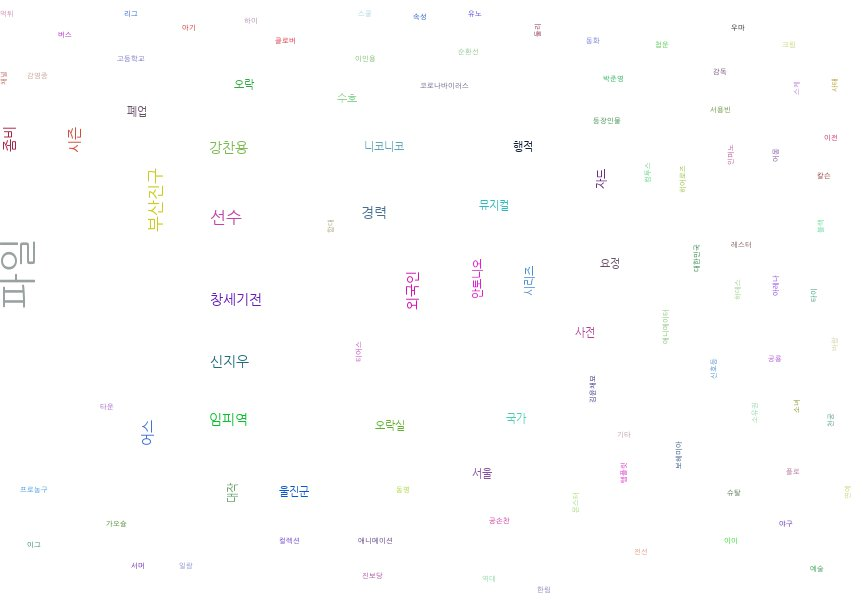

In [ ]:
print('title')
Image(filename='title_word.jpg')

content


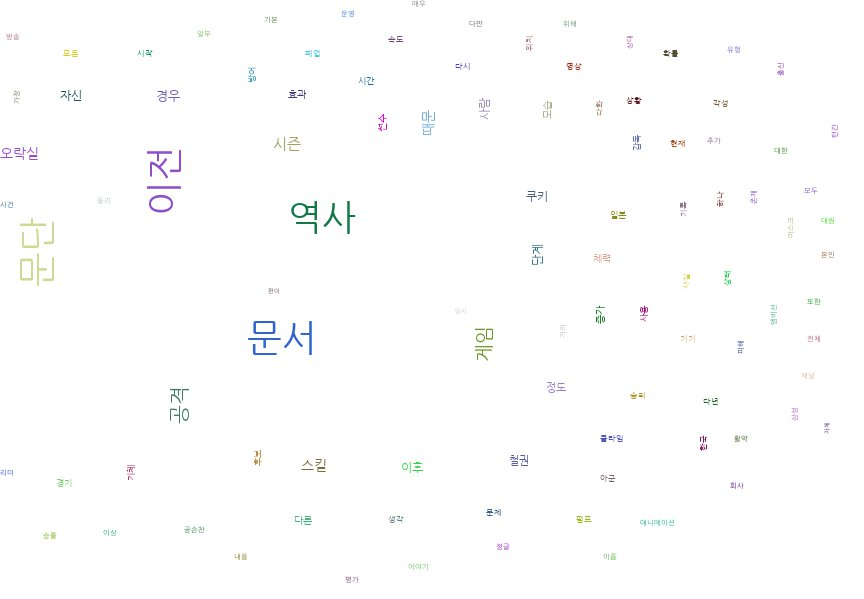

In [ ]:
print('content')
Image(filename='content_word.jpg')